## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/home/sharmaketan/Project Exhibition/GTSRB')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization, MaxPool2D

2022-10-04 12:55:25.445776: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-04 12:55:26.785385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sharmaketan/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-04 12:55:26.785417: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Store data, labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'/home/sharmaketan/Project Exhibition/GTSRB'

## Preprocess the images

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [8]:
os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

FileExistsError: [Errno 17] File exists: 'training'

## Load data & Labels

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [10]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [ ]:
X_train = X_train.reshape(31367, 45, 45)
X_test = X_test.reshape(7842, 45, 45)

ValueError: cannot reshape array of size 84690900 into shape (31367,45,45)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

2022-09-30 16:13:43.956228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sharmaketan/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-09-30 16:13:43.956310: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-30 16:13:43.956362: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sharmaketan-Lenovo-IdeaPad-S145-15IIL): /proc/driver/nvidia/version does not exist
2022-09-30 16:13:43.956925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appr

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 25s 23ms/step - loss: 2.1956 - accuracy: 0.4097 - val_loss: 0.6641 - val_accuracy: 0.8055
Epoch 2/20
981/981 [==============================] - 21s 21ms/step - loss: 0.8257 - accuracy: 0.7581 - val_loss: 0.2352 - val_accuracy: 0.9379
Epoch 3/20
981/981 [==============================] - 21s 22ms/step - loss: 0.5301 - accuracy: 0.8523 - val_loss: 0.1555 - val_accuracy: 0.9625
Epoch 4/20
981/981 [==============================] - 21s 22ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.2336 - val_accuracy: 0.9343
Epoch 5/20
981/981 [==============================] - 22s 22ms/step - loss: 0.3510 - accuracy: 0.9101 - val_loss: 0.0986 - val_accuracy: 0.9762
Epoch 6/20
981/981 [==============================] - 22s 22ms/step - loss: 0.3241 - accuracy: 0.9180 - val_loss: 0.0902 - val_accuracy: 0.9760
Epoch 7/20
981/981 [==============================] - 25s 25ms/step - loss: 0.2794 - accuracy: 0.9260 - val_loss: 0.0878 - val_accuracy:

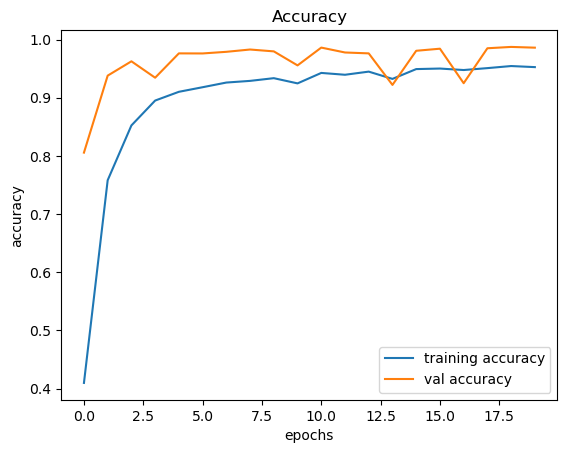

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

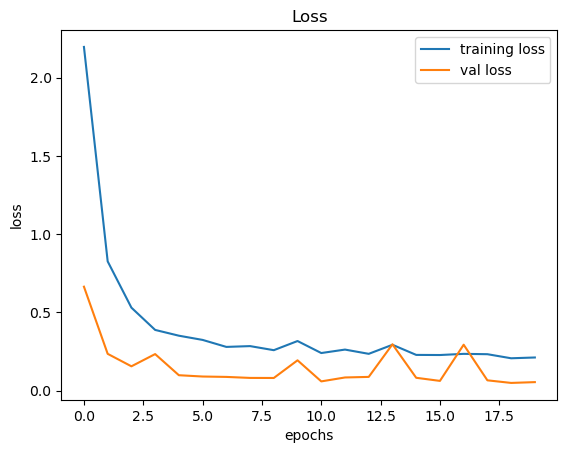

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('Test.csv')

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

395/395 [==============================] - 6s 16ms/step


array([[2.91508559e-25, 4.27940871e-16, 5.67506979e-17, ...,
        3.33766689e-16, 1.18594050e-11, 3.11987585e-25],
       [6.37455548e-29, 9.99999940e-01, 1.23428220e-18, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.81759164e-04, 2.53784135e-02, 3.10560763e-02, ...,
        2.51894146e-02, 9.51962732e-03, 6.60618469e-02],
       [3.70377218e-09, 3.49174934e-06, 5.53729933e-07, ...,
        1.90460605e-06, 1.23139875e-11, 2.55544414e-12],
       [1.80117771e-21, 4.80945265e-15, 3.25125482e-11, ...,
        1.43948386e-11, 6.95377295e-13, 5.76320415e-11]], dtype=float32)

## Accuracy with the test data

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## Save the model

In [ ]:
model.save("./training/TSR.h5")

## Load the Model

In [ ]:
import os
os.chdir(r'/home/sharmaketan/Project Exhibition/GTSRB')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred

1/1 [==============================] - 0s 67ms/step
1
Predicted traffic sign is:  Bumpy road


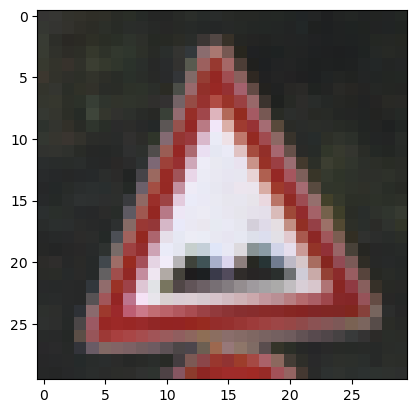

In [ ]:
plot,prediction = test_on_img(r'/home/sharmaketan/Project Exhibition/GTSRB/Test/00500.png')
#print(prediction)
sex = [int(i) for i in prediction[0]] 
print(max(sex))
a = 0
for x in sex:
    if(x == max(sex)):
        break
    a+=1
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()